In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from matplotlib import cm


считаем данные из файла

In [9]:
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM',
                'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B',
                'LSTAT', 'MEDV']
df = pd.read_csv("housing.csv", sep='\s+', names=column_names)
print(df)

        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.90   9.14

In [ ]:
X = df.drop(columns=['MEDV'])
y = df['MEDV']  
print(X)


        CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296.0   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242.0   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242.0   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222.0   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273.0   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273.0   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273.0   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273.0   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273.0   

     PTRATIO       B  LSTAT  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       1

Рассмотрим поведение модели при увеличении количества признаков. Будем добавлять итерационно по одному призанку и высчитывать мерики MSE, MAE и R2. Результаты выведем в виде двумерных графиков

In [11]:
mse = []
mae = []
r2 = []
clf = LinearRegression()
for i in range(1,14):
    tmp_arr_col = column_names[0:i]
    tmp_X = X[tmp_arr_col]
    clf.fit(tmp_X, y)
    y_pred = clf.predict(tmp_X)
    mse.append(mean_squared_error(y, y_pred))
    mae.append(mean_absolute_error(y, y_pred))
    r2.append(r2_score(y, y_pred))

отрисуем полученные данные на двумерных графиках

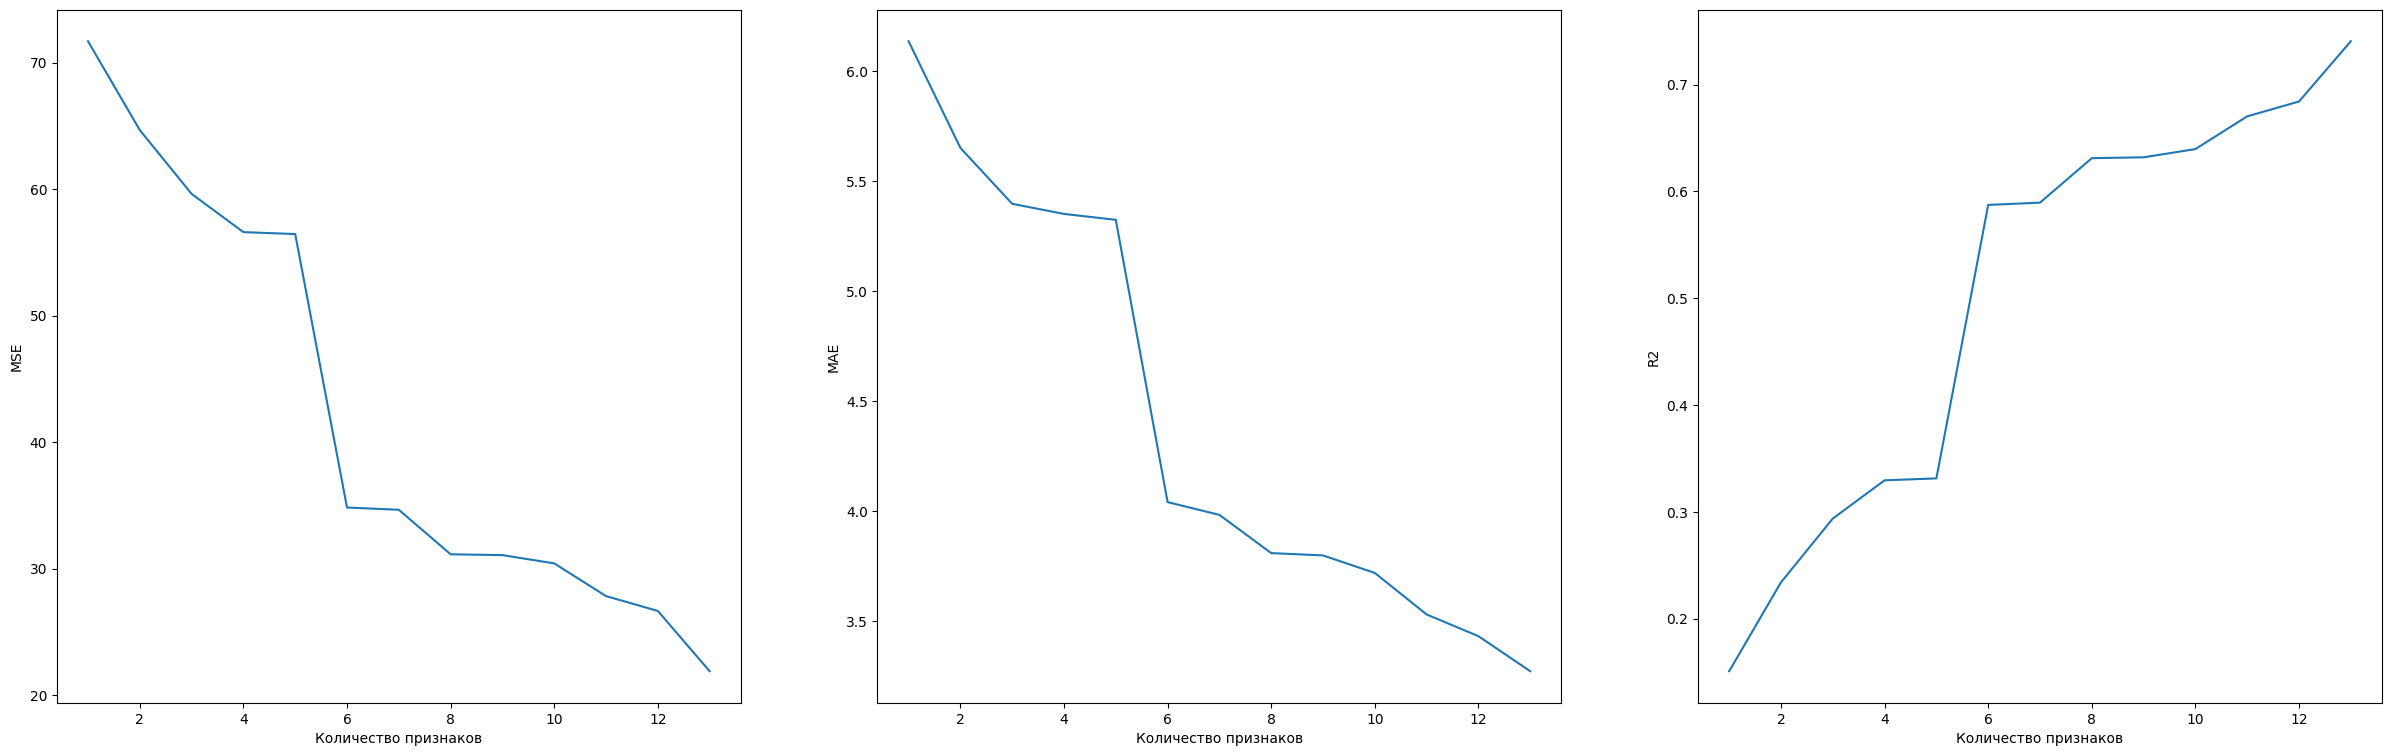

In [12]:
def features_aspects():
    fig = plt.figure(figsize=(30, 9))
    grid = fig.add_gridspec(1, 3)

    grid1 = fig.add_subplot(grid[0, 0])
    grid1.plot(range(1, 14), mse)
    grid1.set_xlabel("Количество признаков")
    grid1.set_ylabel("MSE")

    grid2 = fig.add_subplot(grid[0, 1])
    grid2.plot(range(1, 14), mae)
    grid2.set_xlabel("Количество признаков")
    grid2.set_ylabel("MAE")

    grid3 = fig.add_subplot(grid[0, 2])
    grid3.plot(range(1, 14), r2)
    grid3.set_xlabel("Количество признаков")
    grid3.set_ylabel("R2")


features_aspects()


Из результатов графиков можно понять, что качество модели увеличивается с ростом признаков. В случае MSE и MAE ошибка уменьшается, а в случае R2 метрика растет.

Теперь исследуем зависимость точности от количества элементов. Будем увеличивать каждый раз количество элементов на 100.


In [18]:
mse = []
mae = []
r2 = []
clf = LinearRegression()
for i in range(100, X.shape[0], 100):
    new_X = X.head(i)
    new_y = y.head(i)
    clf.fit(new_X, new_y)
    y_pred = clf.predict(new_X)
    mse.append(mean_squared_error(new_y, y_pred))
    mae.append(mean_absolute_error(new_y, y_pred))
    r2.append(r2_score(new_y, y_pred))

отрисуем полученные данные на двумерных графиках

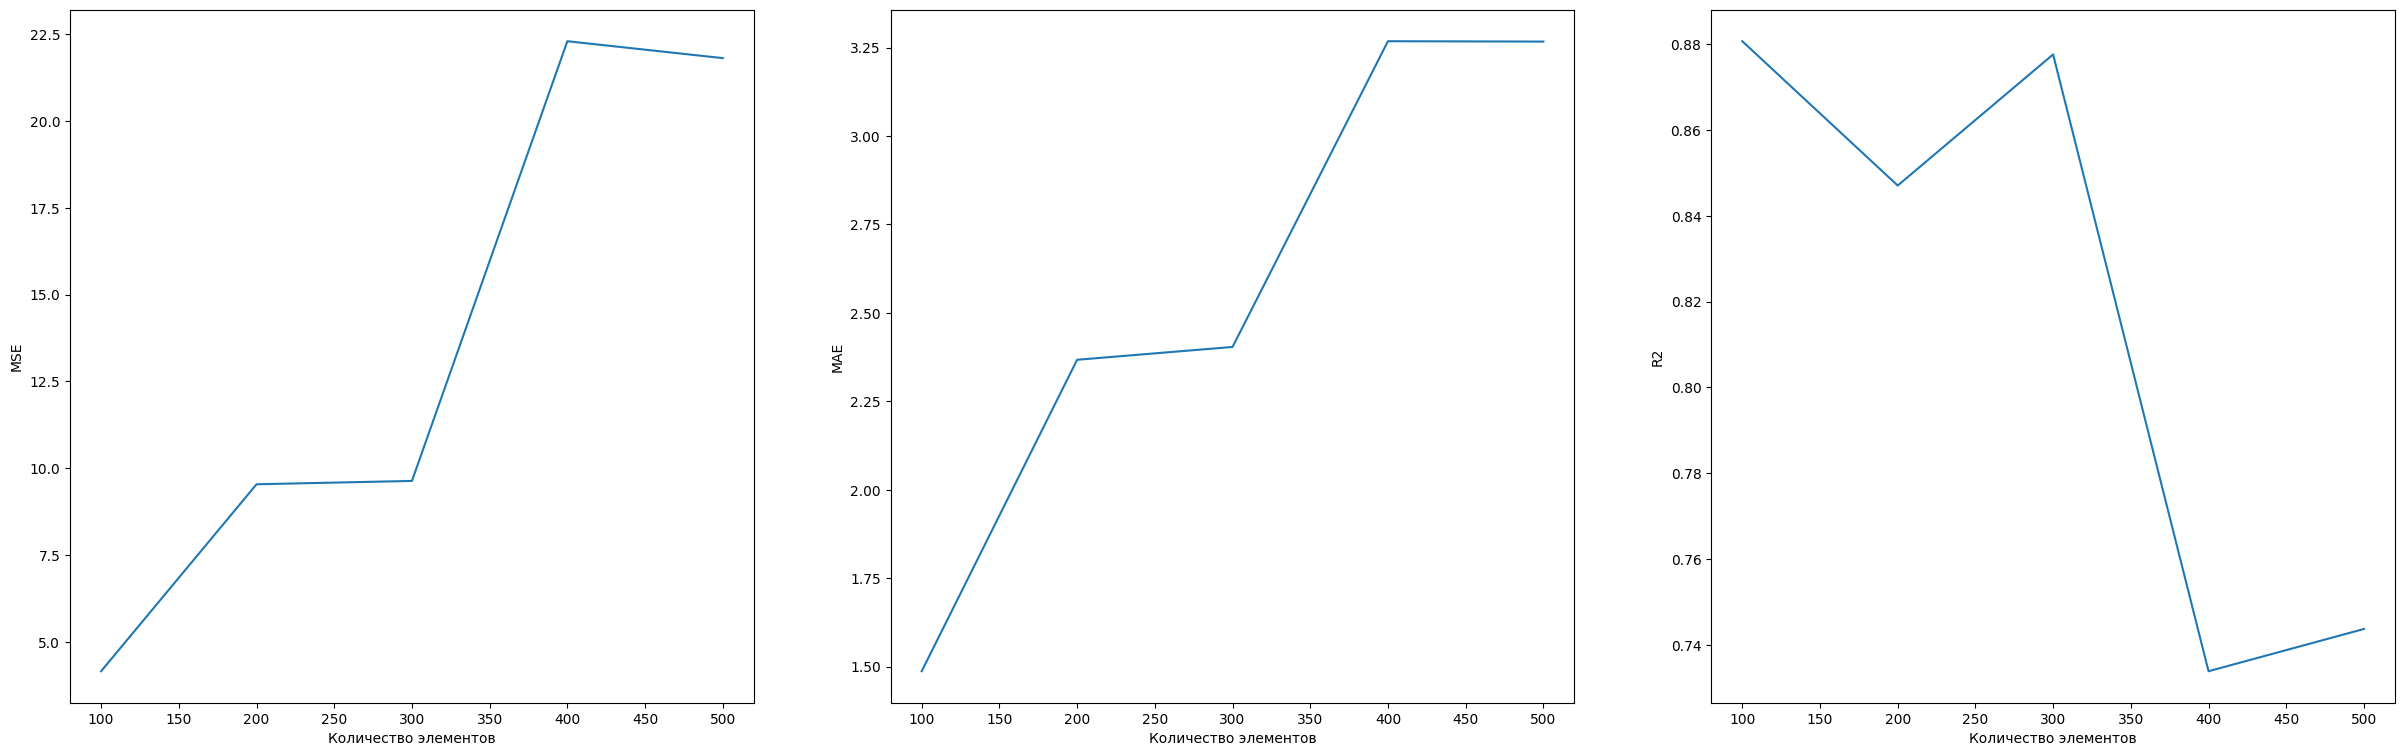

In [22]:
def values_aspects():
    fig = plt.figure(figsize=(30, 9))
    grid = fig.add_gridspec(1, 3)

    grid1 = fig.add_subplot(grid[0, 0])
    grid1.plot(range(100, X.shape[0], 100), mse)
    grid1.set_xlabel("Количество элементов")
    grid1.set_ylabel("MSE")

    grid2 = fig.add_subplot(grid[0, 1])
    grid2.plot(range(100, X.shape[0], 100), mae)
    grid2.set_xlabel("Количество элементов")
    grid2.set_ylabel("MAE")

    grid3 = fig.add_subplot(grid[0, 2])
    grid3.plot(range(100, X.shape[0], 100), r2)
    grid3.set_xlabel("Количество элементов")
    grid3.set_ylabel("R2")

values_aspects()

Из графиков можно увидеть, что при увеличении данных значения метрик ухудшается. значения MSE и MAE растут, а R2 уменьшается

посмтроом модель с двумя признаками. пусть это будут ['CRIM','AGE']. И выведем результат на трехмерном графике

f:\vsCode\python\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Text(0.5, 0, 'y')

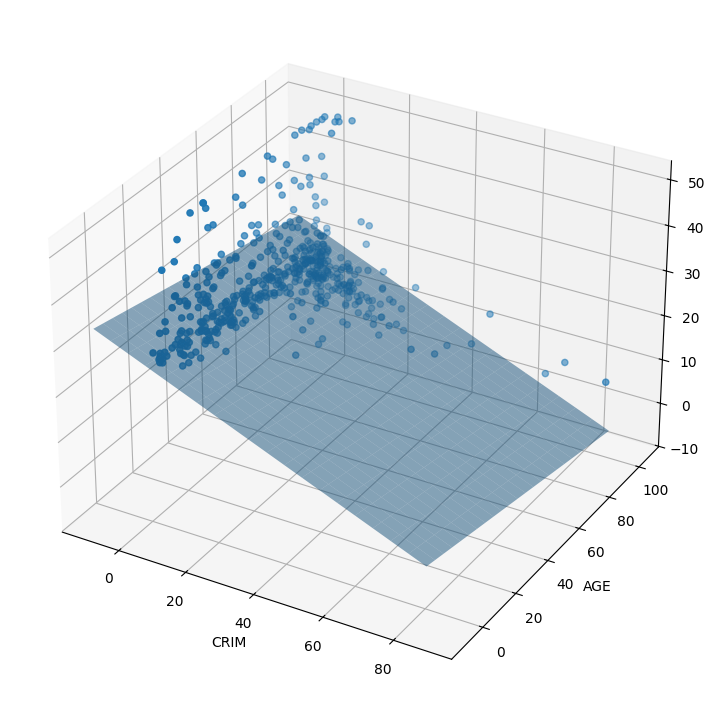

In [38]:
new_X = X[['CRIM','AGE']]
clf = LinearRegression()
clf.fit(new_X, y)

fig = plt.figure(figsize=(16, 9))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(new_X['CRIM'], new_X['AGE'], y)

X_plot, Y_plot = np.meshgrid(np.arange(-10, 90, 5), np.arange(-10, 110, 5))
Z_plot = clf.predict(np.stack((X_plot, Y_plot), axis=2).reshape(480,2)).reshape(24, 20)
ax.plot_surface(X_plot, Y_plot, Z_plot, alpha=0.5)

ax.set_xlabel("CRIM")
ax.set_ylabel("AGE")
ax.set_zlabel("y")
